This is a simple simulation of spurious associations based on the book [Statistical Rethinking by Richard McElreath](https://xcelab.net/rm/statistical-rethinking/) chapter 5.1.

In [17]:
from scipy import stats
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

[]

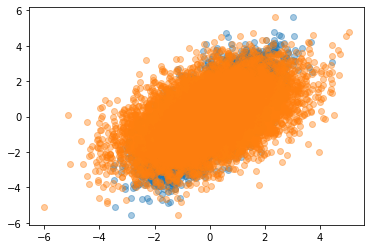

In [22]:
SAMP_SIZE = 10000 # size of sample

x_real = stats.norm.rvs(size=SAMP_SIZE)
x_spur = stats.norm.rvs(x_real)
y = stats.norm.rvs(x_real)

plt.plot(x_real, y, 'o', alpha=0.4)
plt.plot()
plt.plot(x_spur, y, 'o', alpha=0.4)
plt.plot()

<AxesSubplot:>

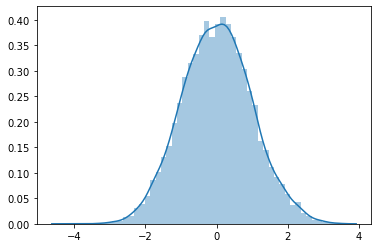

In [13]:
sns.distplot(x_real)

In [14]:
with pm.Model() as spur_t:
    a = pm.Normal('a', 0, 1)
    b = pm.Normal('b', 0, 1)
    c = pm.Normal('c', 0, 1)
    mu = pm.Deterministic('mu', a + b*x_real + c*x_spur)
    sigma = pm.Exponential('sigma', 1)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    
    spur_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, c, b, a]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1907.06draws/s]
The acceptance probability does not match the target. It is 0.8894650166202062, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8830239496584199, but should be close to 0.8. Try to increase the number of tuning steps.


In [15]:
varnames = ['~mu']
az.summary(spur_trace, varnames, round_to=2, kind="stats")

/home/elisio/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%
a,-0.01,0.01,-0.03,0.01
b,1.01,0.01,0.98,1.03
c,-0.01,0.01,-0.03,0.01
sigma,1.01,0.01,0.99,1.02
